## Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this project, I'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

I'll work with two samples of movie ratings: the data in one sample was collected previous to Hickey's analysis, while the other sample was collected after. Let's start by reading in the two samples (which are stored as CSV files) and getting familiar with their structure.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
fandango_before = pd.read_csv('fandango_score_comparison.csv')

In [3]:
fandango_after = pd.read_csv('movie_ratings_16_17.csv')

In [4]:
fandango_before.describe(include="all")

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
unique,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jupiter Ascending (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,NaN,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,NaN,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,NaN,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,NaN,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,NaN,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000


In [5]:
fandango_after.describe(include="all")

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
unique,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Miracles from Heaven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,NaN,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,NaN,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,NaN,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,NaN,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,NaN,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000


In [6]:
print(fandango_before.columns)
print(fandango_after.columns)

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')
Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')


In [7]:
print(fandango_after.shape)

(214, 15)


In [8]:
print(fandango_before.head(3))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0            

In [9]:
print(fandango_after.head(3))

                 movie  year  metascore  imdb  tmeter  audience  fandango  \
0  10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1             13 Hours  2016         48   7.3      50        83       4.5   
2  A Cure for Wellness  2016         47   6.6      40        47       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60       4.5        3.95           4.0      3.5   
1         2.40    3.65       2.5        4.15           2.5      3.5   
2         2.35    3.30       2.0        2.35           2.5      3.5   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  


In [10]:
analysis_before=fandango_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [11]:
analysis_after=fandango_after[['movie', 'year', 'fandango']]

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

At this point, we can either collect new data or change our the goal of our analysis. __We choose the latter and place some limitations on our initial goal__.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, __our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016__. This new goal should also be a fairly good proxy for our initial goal.

## Isolate the Samples We need

With this new research goal, we have two populations of interest:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

In [12]:
sample=analysis_after["movie"].sample(30)
print(sample)

125              Now You See Me 2
89                      Kickboxer
171      The Disappointments Room
159                The Accountant
61                        Get Out
45                Eddie the Eagle
145                     Skiptrace
77        In a Valley of Violence
201                        Trolls
21               Before the Flood
86                        Julieta
109              Midnight Special
129                    Passengers
6          A Street Cat Named Bob
212                   Zoolander 2
141                 Sausage Party
59                         Genius
42                  Dirty Grandpa
121                         Nerve
62                   Ghostbusters
12                        Arrival
188                The Neon Demon
190    The Other Side of the Door
127         Ouija: Origin of Evil
104                     Marauders
211    xXx: Return of Xander Cage
162                       The BFG
153                Swiss Army Man
0             10 Cloverfield Lane
148           

After I checked the movies on Google, the sample seems composed mostly by popular movies, so I consider it enough representative.

In [13]:
movies_2015=analysis_before[analysis_before["FILM"].str.contains(pat = '2015')]

In [14]:
movies_2016=analysis_after[analysis_after["year"]==2016]

In [15]:
print(movies_2015["FILM"].sample(10))
print(movies_2016["year"].sample(10))

108                         A Little Chaos (2015)
61                          American Ultra (2015)
87                                  Maggie (2015)
88                      Mad Max: Fury Road (2015)
44            Kingsman: The Secret Service (2015)
15                                 Taken 3 (2015)
59                               Mortdecai (2015)
136    The Woman In Black 2 Angel of Death (2015)
57                     Ricki and the Flash (2015)
23                           Run All Night (2015)
Name: FILM, dtype: object
73     2016
110    2016
182    2016
76     2016
103    2016
12     2016
90     2016
191    2016
32     2016
54     2016
Name: year, dtype: int64


## Comparing Distribution Shapes for 2015 and 2016

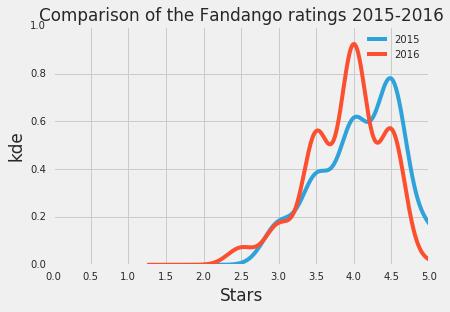

In [16]:
%matplotlib inline
plt.style.use('fivethirtyeight')
movies_2015["Fandango_Stars"].plot.kde(label = '2015', legend = True)
movies_2016["fandango"].plot.kde(label = '2016', legend = True)
plt.title("Comparison of the Fandango ratings 2015-2016").set_fontsize("large")
plt.xlabel('Stars')
plt.ylabel('kde')
ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
plt.xticks(ticks)
plt.xlim(0, 5)
plt.show()

The shape of 2015 ratings is strongly left-skewed, while the 2016 is more softly left-skewed.
While the 2015 curve is peaked on 4.5 and doesn't recall a gaussian at all, the 2016 is more similar to a real gaussian.
A difference is evident, the 2016 ratings are generally lower. The 2016 curve has a more realistic shape, but still seems pretty "optimistic".

## Comparing Relative Frequencies

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

In [17]:
freq_2015=movies_2015['Fandango_Stars'].value_counts(normalize = True)*100
freq_2016=movies_2016['fandango'].value_counts(normalize = True)*100
freq_2015=freq_2015.sort_index(ascending=True)
freq_2016=freq_2016.sort_index(ascending=True)
print(freq_2015)
print(freq_2016)

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


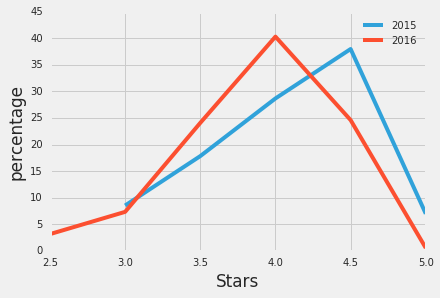

In [18]:
freq_2015.plot.line(label = '2015', legend = True)
freq_2016.plot.line(label = '2016', legend = True)
plt.xlabel('Stars')
plt.ylabel('percentage')

plt.show()

There is a 20% of the total ratings from 4.5 and 5.0 stars in 2015 has been transferred to 3.5 and 4.0 stars in 2016.
The transformation of the 2016 curve respect to the 2015 is still very clear.

## Determining the Direction of the Change

To get a more precise picture about the direction of the difference, I'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [19]:
mean_2015=movies_2015["Fandango_Stars"].mean()
median_2015=movies_2015["Fandango_Stars"].median()
mode_2015=movies_2015["Fandango_Stars"].mode().iloc[0]
mean_2016=movies_2016['fandango'].mean()
median_2016=movies_2016['fandango'].median()
mode_2016=movies_2016['fandango'].mode().iloc[0]
print(mean_2015, " ", median_2015, " ", mode_2015)
print(mean_2016, " ", median_2016, " ", mode_2016)

4.0852713178294575   4.0   4.5
3.887434554973822   4.0   4.0


The 3 values are more close in the 2016 distribution, typical of the more symmetric distributions. The difference between the mean and the median is small, while the mode one is pretty big, since the distributions are peaked on 2 different values. Any way is confirmed that the 2016 marks are lower than the 2015 ones.

In [20]:
statistics=pd.DataFrame([(mean_2015, median_2015, mode_2015),
                        (mean_2016, median_2016, mode_2016)],
                       index=(2015, 2016),
                       columns=("mean", "median", "mode"))
print(statistics)

          mean  median  mode
2015  4.085271     4.0   4.5
2016  3.887435     4.0   4.0


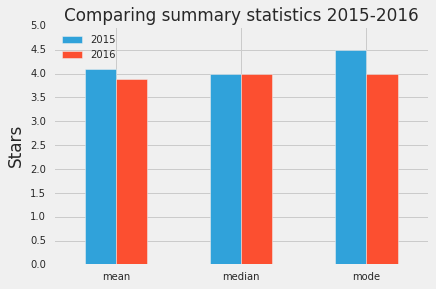

In [21]:
statistics.transpose().plot.bar(rot=0)
plt.title("Comparing summary statistics 2015-2016").set_fontsize("large")
plt.ylabel('Stars')
plt.ylim(0, 5)
plt.yticks(ticks)
plt.legend(loc='best')
plt.show()

In conclusions: I demonstrated that there is indeed a slight difference between the 2 populations.
Since I don't have any others data at my disposal I have to conclude that the change has been caused by the article which can have pushed Fandango administrators not to exaggerate.